We use the sequence generator from Geoffrey Aguirre's lab (https://cfn.upenn.edu/aguirre/wiki/public:web-based_sequence_evaluator) to generate the Type 1 Index 1 sequence of stimuli. We have 20 stimulus categories plus a null fixation trial and a catch trial (semantic question), totaling 22 trial categories.

In [1]:
import numpy as np
from scipy.spatial.distance import squareform
from evalseqshard import EvaluateSeqshard, vec2sim
import matplotlib.pyplot as plt

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Participant number for random seed
participant = 1

In [14]:
# Create dictionary of parameters for EvaluateSeqshard function
parameters = {'N': 22,
              'perms': 10000,
              'TrialDuration': 5,
              'BlankLength': 1,
              'doubleblanks': False,
              'target': 21,
              'numSeqs': 100}

In [15]:
# Simple similarity matrix separating the 20 categories
category_rdm = np.array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,],
                         [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,],
                         [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,],
                         [1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,],
                         [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,],
                         [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,],
                         [1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,],
                         [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,],
                         [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,],
                         [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,],
                         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,],
                         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,],
                         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,],
                         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,],
                         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,],
                         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,],
                         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,],
                         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,],
                         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,],
                         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,]])

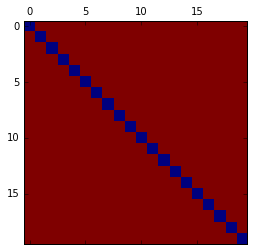

In [16]:
# Plot RDM
%matplotlib inline
plt.matshow(category_rdm); plt.show()

In [17]:
# Reformat single RDM for EvaluateSeqshard function
rdms = category_rdm[:, :, None]

# Set seed to get same sequence across runs
np.random.seed(participant)
results = EvaluateSeqshard(parameters, rdms)

In [18]:
# View condition labels
# 0 = fixation trial, 21 = catch trial
print np.unique(results['BestSeqs'][:, 0])

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.]


In [19]:
# Sort according to the efficiency of the first similarity matrix
sort_idx = np.argsort(results['bestEs'][0, :])[::-1]

In [20]:
# Sort efficiencies and print first fiew
efficiencies = results['bestEs'][0, sort_idx].T
print efficiencies[:10]

[ 0.97010193  0.97010193  0.97010193  0.97010193  0.97010193  0.97010193
  0.97010193  0.97010193  0.97010193  0.97010193]


In [21]:
# Sort sequences and print most efficient
sequences = results['BestSeqs'][:, sort_idx].T
assert len(sequences[0]) == int(parameters['N'])**2 + 1
print sequences[0].shape, sequences[0]

(485,) [ 15.  15.   7.  16.   0.   9.  21.  12.  13.   5.   2.  10.  11.   3.   1.
  18.  17.   8.   6.   4.  19.  20.  14.  14.   7.   9.   0.  16.  21.  13.
  12.  15.   5.  10.   2.  11.   1.   3.  18.   8.  17.   6.  19.   4.  20.
  20.  21.   9.  12.  16.   7.   0.  15.  13.  19.  14.   6.   8.   4.  18.
   1.  17.  11.  10.   3.   2.   5.   5.  21.   2.   0.  12.   7.  13.  15.
  16.   9.  10.   6.  20.  17.  18.   4.   3.  11.   8.   1.  14.  19.  19.
  21.   5.   0.  13.   7.  12.   9.  15.   2.   4.   6.  14.  17.  20.   1.
   8.  11.  18.   3.  16.  10.  10.  21.  11.   0.   5.   7.   2.  15.   9.
  16.  12.   4.  13.  17.  19.   1.   6.   3.   8.  14.  20.  18.  18.  21.
  10.   0.   2.   7.   5.  15.  12.  20.  16.   4.   9.  17.  14.   1.  19.
   3.   6.  11.  13.   8.   8.  21.   3.   0.  10.   7.  11.  15.   1.  20.
  19.  16.  13.   6.  17.   9.   5.  12.   2.  18.  14.   4.   4.  21.   1.
   0.  11.   7.  10.  15.   3.  20.   9.  19.  12.   8.  16.  17.  13.   2.
  14.

Each sequence is $22^2 + 1 = 485$ trials long. We'll use two sequences that end with the same trial number per participant.

In [22]:
# Save efficiencies and sequences
np.savetxt('sequences_{0}.txt'.format(participant),
           sequences, fmt='%d', delimiter=',')
np.savetxt('efficiencies_{0}.txt'.format(participant),
           efficiencies)

In [23]:
# Find next best sequence with same starting trial
sequence_one = sequences[0]
next_best = np.where(sequences[:, 0] == sequence_one[0])[0][1]
sequence_two = sequences[next_best]
assert not np.array_equal(sequence_one, sequence_two)

In [24]:
# Print sequences
print "Session one sequence (efficiency = {0}):\n{1}".format(
        efficiencies[0], sequence_one)
print "Session two sequence (efficiency = {0}):\n{1}".format(
        efficiencies[next_best], sequence_two)

Session one sequence (efficiency = 0.970101933305):
[ 15.  15.   7.  16.   0.   9.  21.  12.  13.   5.   2.  10.  11.   3.   1.
  18.  17.   8.   6.   4.  19.  20.  14.  14.   7.   9.   0.  16.  21.  13.
  12.  15.   5.  10.   2.  11.   1.   3.  18.   8.  17.   6.  19.   4.  20.
  20.  21.   9.  12.  16.   7.   0.  15.  13.  19.  14.   6.   8.   4.  18.
   1.  17.  11.  10.   3.   2.   5.   5.  21.   2.   0.  12.   7.  13.  15.
  16.   9.  10.   6.  20.  17.  18.   4.   3.  11.   8.   1.  14.  19.  19.
  21.   5.   0.  13.   7.  12.   9.  15.   2.   4.   6.  14.  17.  20.   1.
   8.  11.  18.   3.  16.  10.  10.  21.  11.   0.   5.   7.   2.  15.   9.
  16.  12.   4.  13.  17.  19.   1.   6.   3.   8.  14.  20.  18.  18.  21.
  10.   0.   2.   7.   5.  15.  12.  20.  16.   4.   9.  17.  14.   1.  19.
   3.   6.  11.  13.   8.   8.  21.   3.   0.  10.   7.  11.  15.   1.  20.
  19.  16.  13.   6.  17.   9.   5.  12.   2.  18.  14.   4.   4.  21.   1.
   0.  11.   7.  10.  15.   3.  20. 

In [29]:
# Save optimized sequences for sessions 1 and 2
np.savetxt('sequence_subject{0}_session1.txt'.format(participant),
           sequence_one, fmt='%d', delimiter=',')
np.savetxt('sequence_subject{0}_session2.txt'.format(participant),
           sequence_two, fmt='%d', delimiter=',')